In [7]:
import time 
from pynq.overlays.tpd_pynq import tpd_pynqOverlay
import numpy as np
from pynq import pl
from pynq import overlay
from pynq.lib.video import *
from pynq import Xlnk
import cv2
import matplotlib.pyplot as plt
overlay = tpd_pynqOverlay('tpd_pynq.bit')

In [8]:
pixel_in = overlay.pixel_pack_0
pixel_in.bits_per_pixel = 24

colourspace_in = overlay.color_convert_0
rgb2bgr = [0.0, 1.0, 0.0,
           1.0, 0.0, 0.0,
           0.0, 0.0, 1.0,
           0.0, 0.0, 0.0]

colourspace_in.colorspace = rgb2bgr

In [9]:
cam_vdma = overlay.axi_vdma_0
lines = 512
framemode = VideoMode(640, lines, 24)
cam_vdma.readchannel.mode = framemode
cam_vdma.readchannel.start()

In [10]:
tpg = overlay.v_tpg_0
tpg.write(0x10,512)
tpg.write(0x18,640)
tpg.write(0x40,0)
tpg.write(0x30,0)
tpg.write(0x20,0xB)
tpg.write(0x00,0x81)

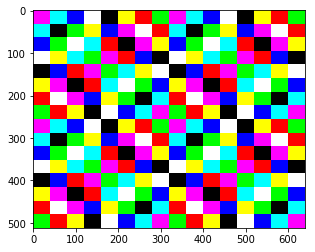

In [11]:
frame_camera = cam_vdma.readchannel.readframe()
frame_color=cv2.cvtColor(frame_camera,cv2.COLOR_BGR2RGB)
pixels = np.array(frame_color)
plt.imshow(pixels)
plt.show()

In [12]:
cam_vdma.readchannel.stop()